In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud

In [2]:
import os
import sys

# Comprueba si el código se está ejecutando en Google Colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

path_absolute = ''
if IN_COLAB:
    print("El código se está ejecutando en Google Colab.")
    from google.colab import drive
    import tensorflow as tf
    print("Versión de TensorFlow:", tf.__version__)
    print("Dispositivos disponibles:", tf.config.list_physical_devices())

    drive.mount('/content/drive')
    path_absolute = '/content/drive/Othercomputers/Mi_portátil/TFM/WorkSpace/DATASET TFM'

    path_workspace = '/content/drive/Othercomputers/Mi_portátil/TFM/WorkSpace/'

    # Cambia al directorio de tu carpeta en Google Drive
    os.chdir(path_absolute)

    # Lista los archivos y carpetas en el directorio actual
    contenido_carpeta = os.listdir(path_absolute)
    print("Contenido de la carpeta en Google Drive:")
    print(contenido_carpeta)

    # Verificar la GPU
    device_name = tf.test.gpu_device_name()
    if device_name != '/device:GPU:0':
        print(f'GPU no encontrada')
    else:
      print(f'Encontrada GPU: {device_name}')

    # Habilitar la GPU para TensorFlow
    physical_devices = tf.config.list_physical_devices('GPU')
    if len(physical_devices) > 0:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print('Memoria de la GPU configurada dinámicamente')
    else:
        print('No se encontraron dispositivos GPU configurables')
else:
    print("El código se está ejecutando en un entorno local.")
    path_workspace ='C:/Users/jaime/OneDrive - Universidad de Málaga/Escritorio/UNIR/TFM/WorkSpace/'
    path_absolute = os.getcwd().replace("\\", "/")
    path_absolute = 'C:/Users/jaime/OneDrive - Universidad de Málaga/Escritorio/UNIR/TFM/WorkSpace/DATASET TFM'

datasets_path = "/ml-25m/"
path_absolute = path_absolute+datasets_path


sys.path.append(path_workspace)

El código se está ejecutando en un entorno local.


# ONE HOT ENCODING DATASET

In [3]:
# dataFrame_onehot_encode = pd.read_csv(path_absolute+'data_moviesRating_tgGen_tgUsrs_onehot_encode.csv')
chunk_size = 800000  # Esto es solo un ejemplo, ajusta el tamaño de acuerdo a tu sistema
chunks = pd.read_csv(path_absolute+'data_moviesRating_tgGen_tgUsrs_onehot_encode.csv', chunksize=chunk_size)
chunks.get_chunk()

,userId,movieId,tag_by_user,tag_genome,title,Action,Adventure,Animation,Children,Comedy,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,timestamp,rating
0,1,296,NaN,"masterpiece, hit men, gratuitous violence, dar...",Pulp Fiction (1994),0,0,0,0,1,...,0,0,0,0,0,1,0,0,1147880044,5.0
1,3,296,NaN,"masterpiece, hit men, gratuitous violence, dar...",Pulp Fiction (1994),0,0,0,0,1,...,0,0,0,0,0,1,0,0,1439474476,5.0
2,4,296,NaN,"masterpiece, hit men, gratuitous violence, dar...",Pulp Fiction (1994),0,0,0,0,1,...,0,0,0,0,0,1,0,0,1573938898,4.0
3,5,296,NaN,"masterpiece, hit men, gratuitous violence, dar...",Pulp Fiction (1994),0,0,0,0,1,...,0,0,0,0,0,1,0,0,830786155,4.0
4,7,296,NaN,"masterpiece, hit men, gratuitous violence, dar...",Pulp Fiction (1994),0,0,0,0,1,...,0,0,0,0,0,1,0,0,835444730,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,58927,236,NaN,"romantic comedy, france, paris, romantic, good...",French Kiss (1995),1,0,0,0,1,...,0,0,0,1,0,0,0,0,831052948,3.0
799996,58933,236,NaN,"romantic comedy, france, paris, romantic, good...",French Kiss (1995),1,0,0,0,1,...,0,0,0,1,0,0,0,0,1423102823,2.0
799997,58938,236,NaN,"romantic comedy, france, paris, romantic, good...",French Kiss (1995),1,0,0,0,1,...,0,0,0,1,0,0,0,0,840879898,2.0
799998,58944,236,NaN,"romantic comedy, france, paris, romantic, good...",French Kiss (1995),1,0,0,0,1,...,0,0,0,1,0,0,0,0,839610593,3.0


### DATASET INFO

In [4]:
chunks.get_chunk().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 800000 to 1599999
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   userId       800000 non-null  int64  
 1   movieId      800000 non-null  int64  
 2   tag_by_user  4644 non-null    object 
 3   tag_genome   800000 non-null  object 
 4   title        800000 non-null  object 
 5   Action       800000 non-null  int64  
 6   Adventure    800000 non-null  int64  
 7   Animation    800000 non-null  int64  
 8   Children     800000 non-null  int64  
 9   Comedy       800000 non-null  int64  
 10  Crime        800000 non-null  int64  
 11  Documentary  800000 non-null  int64  
 12  Drama        800000 non-null  int64  
 13  Fantasy      800000 non-null  int64  
 14  Film-Noir    800000 non-null  int64  
 15  Horror       800000 non-null  int64  
 16  IMAX         800000 non-null  int64  
 17  Musical      800000 non-null  int64  
 18  Mystery      80000

# NORMAL DATASET

In [5]:
dataFrame_without_ohe = pd.read_csv(path_absolute+'data_moviesRating_tgGen_tgUsrs.csv')
print(dataFrame_without_ohe.shape)
dataFrame_without_ohe.head()

C:\Users\jaime\AppData\Local\Temp\ipykernel_15240\4218327248.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  dataFrame_without_ohe = pd.read_csv(path_absolute+'data_moviesRating_tgGen_tgUsrs.csv')


(25000095, 8)


,userId,movieId,tag_by_user,tag_genome,title,genres,timestamp,rating
0,1,296,NaN,"masterpiece, hit men, gratuitous violence, dar...",Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1147880044,5.0
1,3,296,NaN,"masterpiece, hit men, gratuitous violence, dar...",Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1439474476,5.0
2,4,296,NaN,"masterpiece, hit men, gratuitous violence, dar...",Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1573938898,4.0
3,5,296,NaN,"masterpiece, hit men, gratuitous violence, dar...",Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,830786155,4.0
4,7,296,NaN,"masterpiece, hit men, gratuitous violence, dar...",Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,835444730,4.0


In [6]:
data = dataFrame_without_ohe.copy()

In [7]:
# data = data.sample(n=tamanyo_muestra, random_state=42)  # random_state para reproducibilidad
data.head()

,userId,movieId,tag_by_user,tag_genome,title,genres,timestamp,rating
0,1,296,NaN,"masterpiece, hit men, gratuitous violence, dar...",Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1147880044,5.0
1,3,296,NaN,"masterpiece, hit men, gratuitous violence, dar...",Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1439474476,5.0
2,4,296,NaN,"masterpiece, hit men, gratuitous violence, dar...",Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1573938898,4.0
3,5,296,NaN,"masterpiece, hit men, gratuitous violence, dar...",Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,830786155,4.0
4,7,296,NaN,"masterpiece, hit men, gratuitous violence, dar...",Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,835444730,4.0


### DATASET INFO

In [8]:
data.shape

(25000095, 8)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   userId       int64  
 1   movieId      int64  
 2   tag_by_user  object 
 3   tag_genome   object 
 4   title        object 
 5   genres       object 
 6   timestamp    int64  
 7   rating       float64
dtypes: float64(1), int64(3), object(4)
memory usage: 1.5+ GB


### COLUMNAS CATEGORICAS

In [10]:
#Variables categoricas
print("Columnas categóricas", len(data.select_dtypes(include=['object']).columns))
print(f'\t {data.select_dtypes(include=["object"]).columns[0]}')
print(f'\t {data.select_dtypes(include=["object"]).columns[1]}')

Columnas categóricas 4
	 tag_by_user
	 tag_genome


### DATA DESCRIBE

In [11]:
data.describe()

,userId,movieId,timestamp,rating
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,1.215601e+09,3.533854e+00
std,4.679172e+04,3.919886e+04,2.268758e+08,1.060744e+00
min,1.000000e+00,1.000000e+00,7.896520e+08,5.000000e-01
25%,4.051000e+04,1.196000e+03,1.011747e+09,3.000000e+00
50%,8.091400e+04,2.947000e+03,1.198868e+09,3.500000e+00
75%,1.215570e+05,8.623000e+03,1.447205e+09,4.000000e+00
max,1.625410e+05,2.091710e+05,1.574328e+09,5.000000e+00


### REPETICIONES PAR VALOR USER-MOVIE

In [12]:
# Contar repeticiones de pares únicos de userId y movieId
pair_counts = data.groupby(['userId', 'movieId']).size().reset_index(name='count')

# Identificar pares con repeticiones
repeated_pairs = pair_counts[pair_counts['count'] > 1]

# Número de repeticiones para pares únicos
unique_pairs_count = pair_counts['count'].value_counts()

# Imprimir información
if repeated_pairs.empty:
    print(f"No hay pares Usuario-pelicula repetidos")
else:
    print(f"Pares de userId y movieId que se repiten: {repeated_pairs}")

No hay pares Usuario-pelicula repetidos


In [13]:
# Eliminar pares duplicados usuario pelicual
if not repeated_pairs.empty:
    data = data[~data.duplicated(subset=['userId', 'movieId'], keep='first')]
    print(f"Eliminados pares Usuario-pelicula repetidos")

### VALORES UNICOS COLUMNA RATING

In [14]:
# Se cuenta los valores unicos de rating
rango_valores = data['rating'].describe()['min'], data['rating'].describe()['max']
total_de_calificaciones = data['rating'].value_counts()
print("Rango de calificaciones:", rango_valores)
total_de_calificaciones

Rango de calificaciones: (0.5, 5.0)


4.0    6639798
3.0    4896928
5.0    3612474
3.5    3177318
4.5    2200539
2.0    1640868
2.5    1262797
1.0     776815
1.5     399490
0.5     393068
Name: rating, dtype: int64

### VALORES UNICOS COLUMNA USER

In [15]:
# Se cuenta los valores unicos de usuarios
user_uq = data['userId'].value_counts()
print(f'Usuarios únicos: {len(user_uq)}')
user_uq

Usuarios únicos: 162541


72315     32202
80974      9178
137293     8913
33844      7919
20055      7488
          ...  
126446       20
5584         20
125079       20
4265         20
105877       20
Name: userId, Length: 162541, dtype: int64

### VALORES UNICOS PARA LA COLUMNA MOVIES

In [16]:
# Se cuenta los valores unicos de peliculas
movie_uq = data['movieId'].value_counts()
print(f'Peliculas únicos: {len(movie_uq)}')
movie_uq

Peliculas únicos: 59047


356       81491
318       81482
296       79672
593       74127
2571      72674
          ...  
193109        1
112393        1
142793        1
111842        1
200728        1
Name: movieId, Length: 59047, dtype: int64

### VISUALIZACIÓN DE GENEROS

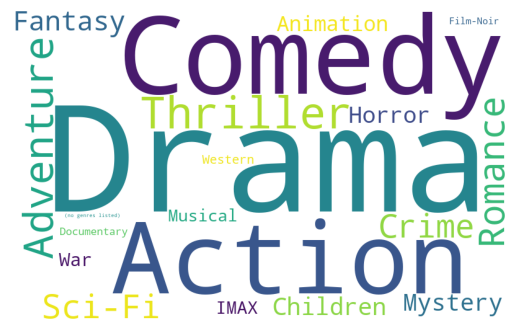

In [17]:
# Cuantos generos distintos hay y cuantqas peliculas clasificadas con ese genero entre otros.
if 'genres' in data.columns:
    genres = {}
    def find_genres():
        for genre in data['genres']:
            words = genre.split('|')
            for word in words:
                genres[word] = genres.get(word, 0) + 1
    find_genres()
    # genres['None'] = genres.pop('(no genres listed)')
    genres

# Nube de palabras para los generos
if 'genres' in data.columns:
    wordcloud = WordCloud(width=800, height=500, background_color = 'white',
                        min_font_size=6, contour_color='black', contour_width=2).generate_from_frequencies(genres)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

### PELICULAS MAS CALIFICADAS 

In [18]:
#Peliculas más puntuadas
df_n_ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
df_n_ratings['total ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
df_n_ratings.rename(columns = {'rating': 'mean ratings'}, inplace=True)
df_n_ratings.sort_values('total ratings', ascending=False).head(10)

,mean ratings,total ratings
title,,
Forrest Gump (1994),4.048011,81491
"Shawshank Redemption, The (1994)",4.413576,81482
Pulp Fiction (1994),4.188912,79672
"Silence of the Lambs, The (1991)",4.151342,74127
"Matrix, The (1999)",4.154099,72674
Star Wars: Episode IV - A New Hope (1977),4.120189,68717
Jurassic Park (1993),3.679175,64144
Schindler's List (1993),4.247579,60411
Braveheart (1995),4.002273,59184


### DISTRIBUCIÓN DE LA FRECUENCIA DEL NÚMERO DE CALIFICACIONES

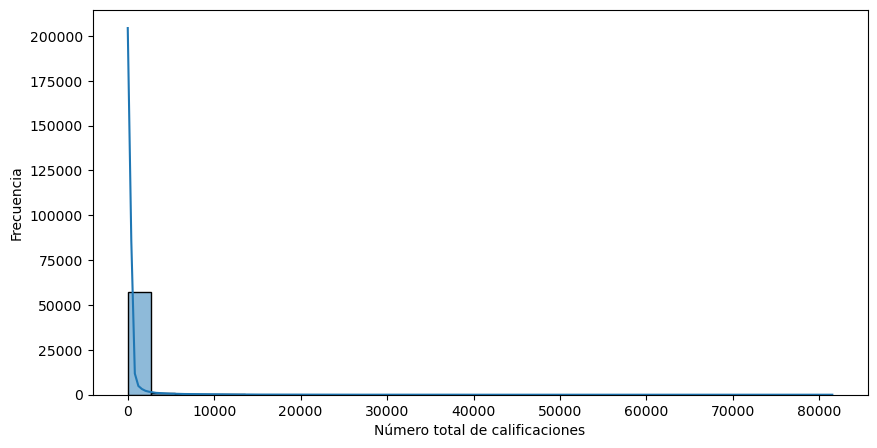

In [19]:
# histograma de la distribución de frecuencia del número total de calificaciones en el DataFrame
plt.figure(figsize=(10,5))
sns.histplot(df_n_ratings['total ratings'], bins=30, kde=True)  # kde=True incluye la estimación de densidad kernel
plt.xlabel('Número total de calificaciones')
plt.ylabel('Frecuencia')
plt.show()

### DISTRIBUCIÓN DE CALIFICACIONES

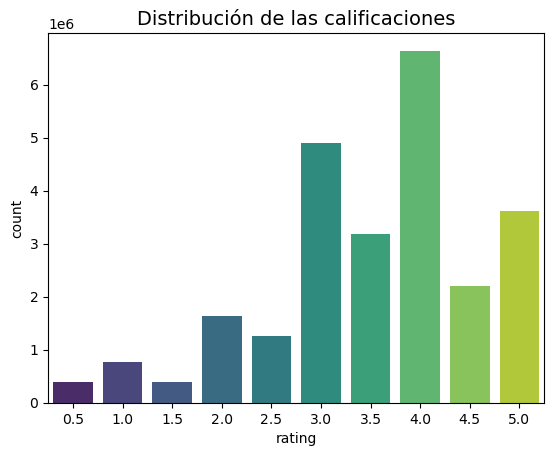

In [20]:
sns.countplot(x="rating", data=pd.DataFrame(dataFrame_without_ohe['rating']) , palette="viridis")
plt.title("Distribución de las calificaciones", fontsize=14)
plt.show()

### DISTRIBUCIÓN DE LA MEDIA DE CALIFICACIONES

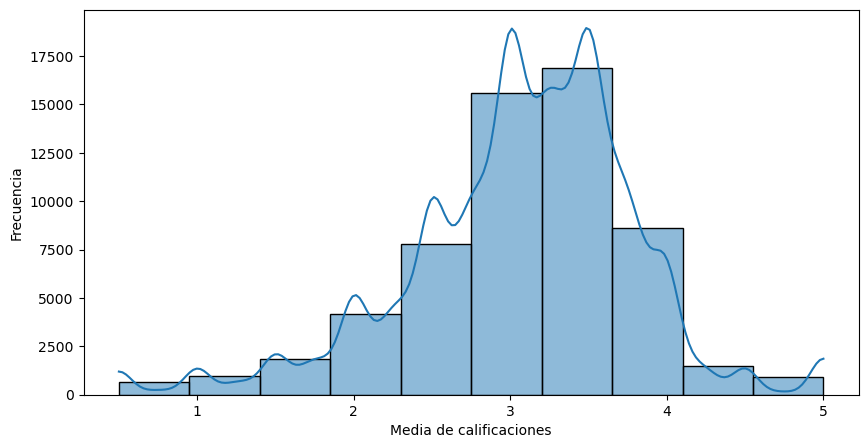

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(df_n_ratings['mean ratings'], bins=10, kde=True)
plt.xlabel('Media de calificaciones')
plt.ylabel('Frecuencia')
plt.show()

### RELACIÓN ENTRE LAS MEDIAS DE LAS CLAIFICACIONES Y EL NÚMERO TOTA DE CALIFICACIONES

In [22]:
# sns.jointplot(x='mean ratings', y='total ratings', data=df_n_ratings, height=8, ratio=4)

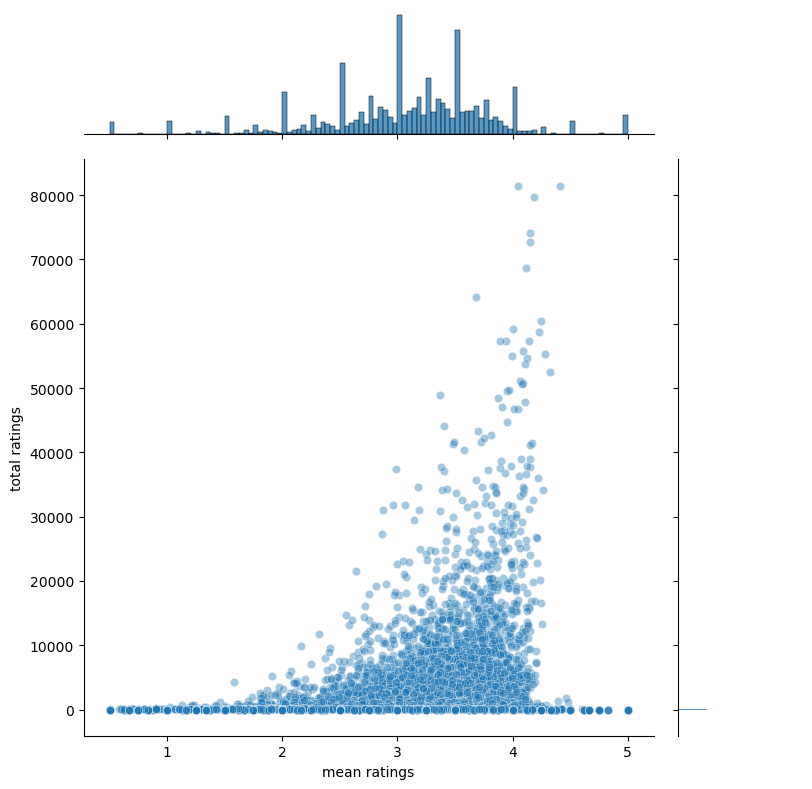

In [23]:
sns.jointplot(x='mean ratings', y='total ratings', data=df_n_ratings, height=8, ratio=4, alpha=0.4,)

### MATRIZ DE CORRELACIÓN

C:\Users\jaime\AppData\Local\Temp\ipykernel_15240\2193918581.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tc = data.corr()


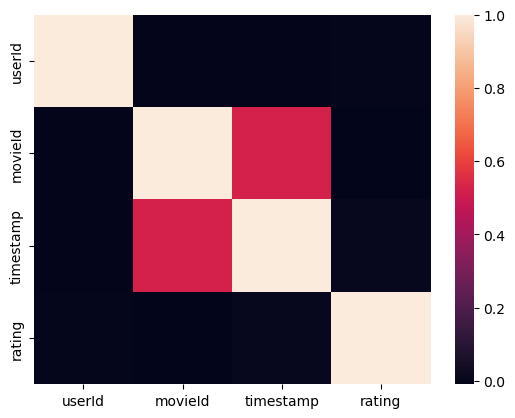

In [24]:
tc = data.corr()
sns.heatmap(tc)
plt.show()

### DISTRIBUCIÓN Y ESTADÍSTICAS DESCRIPTIVAS DE CALIFICACIONES POR USUARIO

In [25]:
# Calcular el número de calificaciones por usuario
distribucion_calificaciones_por_usuario = data['userId'].value_counts()

# Obtener estadísticas descriptivas
estadisticas_descriptivas = distribucion_calificaciones_por_usuario.describe()

print("Estadísticas descriptivas del número de calificaciones por usuario:")
print(estadisticas_descriptivas)


Estadísticas descriptivas del número de calificaciones por usuario:
count    162541.000000
mean        153.807932
std         268.047590
min          20.000000
25%          36.000000
50%          71.000000
75%         162.000000
max       32202.000000
Name: userId, dtype: float64


- **Count (Recuento):** Hay 162,541 usuarios únicos en el conjunto de datos que han calificado al menos una película.

- **Mean (Media):** En promedio, cada usuario ha calificado aproximadamente 153.81 películas. Esto indica la cantidad promedio de interacciones por usuario con el sistema de calificaciones.

- **Std (Desviación Estándar):** La desviación estándar es de aproximadamente 268.05. Este es un valor alto, lo que indica que hay una gran variabilidad en el número de calificaciones por usuario. En otras palabras, algunos usuarios han calificado muchas más películas que otros.

- **Min (Mínimo):** El usuario menos activo ha calificado 20 películas. Este es el mínimo de calificaciones que un usuario debe tener para ser incluido en este conjunto de datos.

- **25% (Percentil 25):** El 25% de los usuarios ha calificado 36 películas o menos. Esto significa que la mayoría de los usuarios (75%) han calificado más de 36 películas.

- **50% (Mediana o Percentil 50):** La mediana del número de calificaciones por usuario es 71, lo que significa que la mitad de los usuarios ha calificado más de 71 películas y la otra mitad menos. La mediana es significativamente menor que la media, lo que sugiere una distribución sesgada con un grupo pequeño de usuarios muy activos que sesgan la media hacia arriba.

- **75% (Percentil 75):** El 75% de los usuarios ha calificado 162 películas o menos. Por lo tanto, solo el 25% de los usuarios ha calificado más de 162 películas.

- **Max (Máximo):** El usuario más activo ha calificado 32,202 películas. Este número extremadamente alto sugiere la presencia de outliers o usuarios excepcionalmente activos que podrían ser considerados como 'superusuarios' en términos de la cantidad de calificaciones proporcionadas.

Esta distribución y las estadísticas descriptivas indican que hay una amplia gama en el nivel de actividad de los usuarios en el sistema de calificaciones. El gran desvío estándar y la diferencia entre la media y la mediana sugieren una distribución sesgada con algunos usuarios que califican muchas más películas que el usuario promedio, lo que es típico en muchos sistemas de recomendación donde pocos usuarios son extremadamente activos mientras que la mayoría son menos activos.

### ELIMINAR OUTLIERS

Eliminar Outliers: Se considerar eliminar los outliers, como el usuario que calificó 32,202 películas, ya que estos pueden sesgar los análisis. Una regla común es eliminar datos que están más allá de 1.5 veces el rango intercuartílico (IQR) por encima del percentil 75 o por debajo del percentil 25.

In [26]:
# Calcula Q1 y Q3.
df_aux = data.copy()

Q1 = df_aux['userId'].value_counts().quantile(0.25)
Q3 = df_aux['userId'].value_counts().quantile(0.75)
IQR = Q3 - Q1

# Define los límites para los outliers.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtra los outliers.
filtered_df = df_aux.groupby('userId').filter(lambda x: x['userId'].count() >= lower_bound and x['userId'].count() <= upper_bound)

# Muestra las estadísticas descriptivas después de filtrar.
estadisticas_descriptivas_filtered = filtered_df['userId'].value_counts().describe()
print(f"Estadísticas descriptivas del número de calificaciones por usuario después de filtrar outliers: \n{estadisticas_descriptivas_filtered}")

Estadísticas descriptivas del número de calificaciones por usuario después de filtrar outliers: 
count    146176.000000
mean         90.797463
std          76.636902
min          20.000000
25%          33.000000
50%          61.000000
75%         122.000000
max         351.000000
Name: userId, dtype: float64


In [27]:
data = filtered_df.copy()
print(f"Data size: \n{data.shape}")

Data size: 
(13272410, 8)


### TOMAR SOLO LOS USUARIOS CON UN MINIMO DE CALIFICACIONES

Usar la Mediana (Percentil 50): Establecer el umbral en 71 calificaciones eliminaría a la mitad de los usuarios más inactivos. Esto podría ser una buena elección de compromiso que asegura que los usuarios incluidos en el análisis tienen una participación suficientemente activa, lo que puede ser importante para la estabilidad estadística y la representatividad de los datos.

In [28]:
# Calcula la mediana de las calificaciones por usuario.
median_calificaciones = data['userId'].value_counts().median()

# Filtra el DataFrame para incluir solo a los usuarios con un número de calificaciones mayor o igual que la mediana.
df_min_calificaciones = data.groupby('userId').filter(lambda x: x['userId'].count() >= median_calificaciones)

data = df_min_calificaciones.copy()
print(f"Data size: \n{data.shape}")

Data size: 
(10699557, 8)


### VALORES NULOS POR COLUMNA

In [29]:
# Cuenta los valores nulos en cada columna del DataFrame
valores_nulos_por_columna = data.isnull().sum()

# Cuenta los valores nulos en todo el DataFrame
total_valores_nulos = data.isnull().sum().sum()

# Imprime la cantidad de valores nulos por columna
print("Valores nulos por columna:")
print(valores_nulos_por_columna)

# Imprime el total de valores nulos en el DataFrame
print("\nTotal de valores nulos en el dataset:", total_valores_nulos)

Valores nulos por columna:
userId                0
movieId               0
tag_by_user    10643395
tag_genome        39173
title                 0
genres                0
timestamp             0
rating                0
dtype: int64

Total de valores nulos en el dataset: 10682568


### ELIMINAR VALORES NULOS DE LAS COLUMNAS TAG_BY_USER Y TAG_GENOME

In [30]:
def eliminar_filas_nulas(df, columna):
    # Eliminar las filas con valores nulos en la columna deseada
    df = df.dropna(subset=[columna])
    return df

In [31]:
dataFrame_without_ohe_non_null = eliminar_filas_nulas(data, 'tag_genome')
dataFrame_without_ohe_non_null = eliminar_filas_nulas(data, 'tag_by_user')
data = dataFrame_without_ohe_non_null.copy()

In [32]:
data.shape

(56162, 8)

In [33]:
data.head()

,userId,movieId,tag_by_user,tag_genome,title,genres,timestamp,rating
243,521,296,"r:strong language, great cast excellent, ironi...","masterpiece, hit men, gratuitous violence, dar...",Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1279793342,5.0
351,741,296,"r:strong language, great cast excellent, ironi...","masterpiece, hit men, gratuitous violence, dar...",Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1262230676,4.0
490,1028,296,"r:strong language, great cast excellent, ironi...","masterpiece, hit men, gratuitous violence, dar...",Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1303088217,5.0
1014,2057,296,"r:strong language, great cast excellent, ironi...","masterpiece, hit men, gratuitous violence, dar...",Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1432118815,4.5
1325,2730,296,"r:strong language, great cast excellent, ironi...","masterpiece, hit men, gratuitous violence, dar...",Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1450742665,4.0


In [34]:
data.to_csv(path_absolute+'data_moviesRating_tgGen_tgUsrs_min_ratins.csv', index=False)

El conjunto de datos y las visualizaciones proporcionadas ofrecen una amplia comprensión del comportamiento de los usuarios y sus interacciones con películas en una plataforma de recomendación. Aquí hay un resumen y algunas conclusiones basadas en la descripción y las imágenes proporcionadas:

1. **Carga y Revisión de Datos**: Se cargó un conjunto de datos con múltiples atributos como usuario, película, tags y calificaciones. Se detectaron advertencias de tipos de datos mixtos que pueden necesitar una limpieza más detallada para la consistencia de los datos.

2. **Limpieza de Datos**: Se realizó un proceso de limpieza para eliminar duplicados del par usuario-película, asegurando que cada interacción sea única.

3. **Análisis Descriptivo**: Se realizó un análisis descriptivo para entender la distribución general de las calificaciones y la actividad del usuario, destacando una media de calificaciones por usuario y una gran varianza, lo que indica niveles de actividad dispares.

4. **Visualizaciones**:
   - La nube de palabras de géneros (imagen 1) muestra la frecuencia de cada género cinematográfico en el conjunto de datos, destacando los más populares como Drama, Comedia y Acción.
   - La distribución de la frecuencia del número de calificaciones (imagen 2) indica una distribución muy sesgada con una mayoría de películas que tienen relativamente pocas calificaciones.
   - La distribución de las calificaciones (imagen 3) muestra que las calificaciones más altas son más comunes, lo que podría indicar una tendencia de los usuarios a calificar positivamente las películas o un sesgo de selección en las películas que eligen calificar.
   - La relación entre las calificaciones medias y el número total de calificaciones (imagen 4) sugiere que hay películas con altas calificaciones medias y un número significativo de calificaciones.
   - La distribución de la media de calificaciones (imagen 5) muestra que la mayoría de las películas tienen calificaciones promedio alrededor de 3 a 4, lo que indica una percepción general positiva de las películas en el conjunto de datos.
   - La matriz de correlación (imagen 6) puede proporcionar información sobre la relación entre diferentes variables numéricas del conjunto de datos, aunque las etiquetas no son visibles en la imagen proporcionada.

5. **Eliminación de Outliers**: Se implementó un método para eliminar outliers basado en el IQR, lo que ayuda a normalizar la actividad del usuario y a obtener un conjunto de datos más representativo para el análisis.

6. **Filtro por Actividad del Usuario**: Se estableció un umbral de calificaciones basado en la mediana para incluir solo a los usuarios más activos, lo que puede mejorar la calidad de los datos para análisis posteriores.

7. **Tratamiento de Valores Nulos**: Se contabilizaron y eliminaron los valores nulos de ciertas columnas, lo que es crucial para la precisión de los análisis y modelos de aprendizaje automático.

**Conclusiones Generales**:
- Los usuarios tienden a calificar más las películas que les gustan, como lo sugieren las altas calificaciones promedio.
- Hay una amplia gama en el número de calificaciones por usuario, lo que podría indicar diferentes niveles de compromiso con la plataforma.
- Las películas de Drama, Comedia y Acción son las más populares entre los usuarios.
- La limpieza de datos es esencial para garantizar la validez de los análisis y el desempeño de los modelos de recomendación.

Estas conclusiones y la comprensión de los datos son fundamentales para diseñar y mejorar sistemas de recomendación de películas que satisfagan las preferencias de los usuarios de manera más efectiva.